# Exploratory Data Analysis

![title](../assets/breast_cancer.jpg)

## Imports

In [6]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

In [7]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [9]:
from df_overview import DfOverview
from df_outlier import DfOutlier
from file_handler import FileHandler
import vis_seaborn as vs
from eda_helper import Helper
from df_cleaner import *

In [10]:
helper = Helper()

## Data

Features are computed from a digitized image (shown above) of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The mean, standard error and "worst" or largest of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.All feature values are recoded with four significant digits.

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- ID number
- Diagnosis(M=malignant, B=benign)
- radius(mean of distances from center to points on the perimeter)
- texture(standard deviation of gray - scale values)
- perimeter
- area
- smoothness(local variation in radius lengths)
- compactness(perimeter ^ 2 / area - 1.0)
- concavity(severity of concave portions of the contour)
- concave points(number of concave portions of the contour)
- symmetry
- fractal dimension("coastline approximation" - 1)

## Data reading

In [11]:
# create a FileHandler object
file_handler = FileHandler()

In [12]:
# reading the csv file
df = file_handler.read_csv("../data/data.csv")
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0    842302         M        17.99         10.38          122.80    1001.00             0.12              0.28            0.30                 0.15           0.24                    0.08       1.09        0.91          8.59   153.40           0.01            0.05          0.05               0.02         0.03                  0.01         25.38          17.33           184.60     2019.00              0.16               0.67             0.71                  0.27            0.46                     0.12          NaN
1    842517         M        20.57         17.77          132.90    1326.00             0.08              0.08            0.09                 0.07           0.18                    0.06       0.54        0.73          3.40    74.08           0.01            0.01          0.02               0.01         0.01                  0.00         24.99          23.41           158.80     1956.00              0.12               0.19             0.24                  0.19            0.28                     0.09          NaN
2  84300903         M        19.69         21.25          130.00    1203.00             0.11              0.16            0.20                 0.13           0.21                    0.06       0.75        0.79          4.58    94.03           0.01            0.04          0.04               0.02         0.02                  0.00         23.57          25.53           152.50     1709.00              0.14               0.42             0.45                  0.24            0.36                     0.09          NaN
3  84348301         M        11.42         20.38           77.58     386.10             0.14              0.28            0.24                 0.11           0.26                    0.10       0.50        1.16          3.44    27.23           0.01            0.07          0.06               0.02         0.06                  0.01         14.91          26.50            98.87      567.70              0.21               0.87             0.69                  0.26            0.66                     0.17          NaN
4  84358402         M        20.29         14.34          135.10    1297.00             0.10              0.13            0.20                 0.10           0.18                    0.06       0.76        0.78          5.44    94.44           0.01            0.02          0.06               0.02         0.02                  0.01         22.54          16.67           152.20     1575.00              0.14               0.20             0.40                  0.16            0.24                     0.08          NaN

## General Statistics

In [13]:
# number of elements in the df
df.size

18777

In [14]:
# rows and columns in the df
df.shape

(569, 33)

In [15]:
df_overview = DfOverview(df.drop(columns=['id']))
df_ = df_overview.getOverview()
vs.view_df(df_, ["unique_value_count", "count", "none_count"])

label 
 count 
 none_count 
 none_percentage 
 unique_value_count 
 unique_percentage 
 dtype 
 
 
 
 
 0 
 DIAGNOSIS 
 569 
 0 
 0.0% 
 2 
 0.35% 
 object 
 
 
 1 
 SYMMETRY_WORST 
 569 
 0 
 0.0% 
 500 
 87.87% 
 float64 
 
 
 2 
 CONCAVE POINTS_WORST 
 569 
 0 
 0.0% 
 492 
 86.47% 
 float64 
 
 
 3 
 CONCAVITY_WORST 
 569 
 0 
 0.0% 
 539 
 94.73% 
 float64 
 
 
 4 
 COMPACTNESS_WORST 
 569 
 0 
 0.0% 
 529 
 92.97% 
 float64 
 
 
 5 
 SMOOTHNESS_WORST 
 569 
 0 
 0.0% 
 411 
 72.23% 
 float64 
 
 
 6 
 AREA_WORST 
 569 
 0 
 0.0% 
 544 
 95.61% 
 float64 
 
 
 7 
 PERIMETER_WORST 
 569 
 0 
 0.0% 
 514 
 90.33% 
 float64 
 
 
 8 
 TEXTURE_WORST 
 569 
 0 
 0.0% 
 511 
 89.81% 
 float64 
 
 
 9 
 RADIUS_WORST 
 569 
 0 
 0.0% 
 457 
 80.32% 
 float64 
 
 
 10 
 FRACTAL_DIMENSION_SE 
 569 
 0 
 0.0% 
 545 
 95.78% 
 float64 
 
 
 11 
 SYMMETRY_SE 
 569 
 0 
 0.0% 
 498 
 87.52% 
 float64 
 
 
 12 
 CONCAVE POINTS_SE 
 569 
 0 
 0.0% 
 507 
 89.1% 
 float64 
 
 
 13 
 CONCAVITY_SE 
 569 
 0 
 0.0% 
 533 
 93.67% 
 float64 
 
 
 14 
 COMPACTNESS_SE 
 569 
 0 
 0.0% 
 541 
 95.08% 
 float64 
 
 
 15 
 SMOOTHNESS_SE 
 569 
 0 
 0.0% 
 547 
 96.13% 
 float64 
 
 
 16 
 AREA_SE 
 569 
 0 
 0.0% 
 528 
 92.79% 
 float64 
 
 
 17 
 PERIMETER_SE 
 569 
 0 
 0.0% 
 533 
 93.67% 
 float64 
 
 
 18 
 TEXTURE_SE 
 569 
 0 
 0.0% 
 519 
 91.21% 
 float64 
 
 
 19 
 RADIUS_SE 
 569 
 0 
 0.0% 
 540 
 94.9% 
 float64 
 
 
 20 
 FRACTAL_DIMENSION_MEAN 
 569 
 0 
 0.0% 
 499 
 87.7% 
 float64 
 
 
 21 
 SYMMETRY_MEAN 
 569 
 0 
 0.0% 
 432 
 75.92% 
 float64 
 
 
 22 
 CONCAVE POINTS_MEAN 
 569 
 0 
 0.0% 
 542 
 95.25% 
 float64 
 
 
 23 
 CONCAVITY_MEAN 
 569 
 0 
 0.0% 
 537 
 94.38% 
 float64 
 
 
 24 
 COMPACTNESS_MEAN 
 569 
 0 
 0.0% 
 537 
 94.38% 
 float64 
 
 
 25 
 SMOOTHNESS_MEAN 
 569 
 0 
 0.0% 
 474 
 83.3% 
 float64 
 
 
 26 
 AREA_MEAN 
 569 
 0 
 0.0% 
 539 
 94.73% 
 float64 
 
 
 27 
 PERIMETER_MEAN 
 569 
 0 
 0.0% 
 522 
 91.74% 
 float64 
 
 
 28 
 TEXTURE_MEAN 
 569 
 0 
 0.0% 
 479 
 84.18% 
 float64 
 
 
 29 
 RADIUS_MEAN 
 569 
 0 
 0.0% 
 456 
 80.14% 
 float64 
 
 
 30 
 FRACTAL_DIMENSION_WORST 
 569 
 0 
 0.0% 
 535 
 94.02% 
 float64 
 
 
 31 
 UNNAMED: 32 
 0 
 569 
 100.0% 
 0 
 0.0% 
 float64

We can see here that we don't have any missing values, except for the column "Unnamed: 32", which has no value at all.

In [16]:
drop_columns(df, ['Unnamed: 32'])

1 column was dropped.


## Data Types

Let's check if there are columns with mixed data types.

In [17]:
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [18]:
df_ = df.drop(columns=['id', 'diagnosis']).describe().T.reset_index().rename(columns={'index': 'labels'})
vs.view_df(df_, ['mean', 'min', '25%', '50%', '75%', 'max'])

index 
 labels 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 0 
 0 
 radius_mean 
 569.000000 
 14.127292 
 3.524049 
 6.981000 
 11.700000 
 13.370000 
 15.780000 
 28.110000 
 
 
 1 
 1 
 texture_mean 
 569.000000 
 19.289649 
 4.301036 
 9.710000 
 16.170000 
 18.840000 
 21.800000 
 39.280000 
 
 
 2 
 2 
 perimeter_mean 
 569.000000 
 91.969033 
 24.298981 
 43.790000 
 75.170000 
 86.240000 
 104.100000 
 188.500000 
 
 
 3 
 3 
 area_mean 
 569.000000 
 654.889104 
 351.914129 
 143.500000 
 420.300000 
 551.100000 
 782.700000 
 2501.000000 
 
 
 4 
 4 
 smoothness_mean 
 569.000000 
 0.096360 
 0.014064 
 0.052630 
 0.086370 
 0.095870 
 0.105300 
 0.163400 
 
 
 5 
 5 
 compactness_mean 
 569.000000 
 0.104341 
 0.052813 
 0.019380 
 0.064920 
 0.092630 
 0.130400 
 0.345400 
 
 
 6 
 6 
 concavity_mean 
 569.000000 
 0.088799 
 0.079720 
 0.000000 
 0.029560 
 0.061540 
 0.130700 
 0.426800 
 
 
 7 
 7 
 concave points_mean 
 569.000000 
 0.048919 
 0.038803 
 0.000000 
 0.020310 
 0.033500 
 0.074000 
 0.201200 
 
 
 8 
 8 
 symmetry_mean 
 569.000000 
 0.181162 
 0.027414 
 0.106000 
 0.161900 
 0.179200 
 0.195700 
 0.304000 
 
 
 9 
 9 
 fractal_dimension_mean 
 569.000000 
 0.062798 
 0.007060 
 0.049960 
 0.057700 
 0.061540 
 0.066120 
 0.097440 
 
 
 10 
 10 
 radius_se 
 569.000000 
 0.405172 
 0.277313 
 0.111500 
 0.232400 
 0.324200 
 0.478900 
 2.873000 
 
 
 11 
 11 
 texture_se 
 569.000000 
 1.216853 
 0.551648 
 0.360200 
 0.833900 
 1.108000 
 1.474000 
 4.885000 
 
 
 12 
 12 
 perimeter_se 
 569.000000 
 2.866059 
 2.021855 
 0.757000 
 1.606000 
 2.287000 
 3.357000 
 21.980000 
 
 
 13 
 13 
 area_se 
 569.000000 
 40.337079 
 45.491006 
 6.802000 
 17.850000 
 24.530000 
 45.190000 
 542.200000 
 
 
 14 
 14 
 smoothness_se 
 569.000000 
 0.007041 
 0.003003 
 0.001713 
 0.005169 
 0.006380 
 0.008146 
 0.031130 
 
 
 15 
 15 
 compactness_se 
 569.000000 
 0.025478 
 0.017908 
 0.002252 
 0.013080 
 0.020450 
 0.032450 
 0.135400 
 
 
 16 
 16 
 concavity_se 
 569.000000 
 0.031894 
 0.030186 
 0.000000 
 0.015090 
 0.025890 
 0.042050 
 0.396000 
 
 
 17 
 17 
 concave points_se 
 569.000000 
 0.011796 
 0.006170 
 0.000000 
 0.007638 
 0.010930 
 0.014710 
 0.052790 
 
 
 18 
 18 
 symmetry_se 
 569.000000 
 0.020542 
 0.008266 
 0.007882 
 0.015160 
 0.018730 
 0.023480 
 0.078950 
 
 
 19 
 19 
 fractal_dimension_se 
 569.000000 
 0.003795 
 0.002646 
 0.000895 
 0.002248 
 0.003187 
 0.004558 
 0.029840 
 
 
 20 
 20 
 radius_worst 
 569.000000 
 16.269190 
 4.833242 
 7.930000 
 13.010000 
 14.970000 
 18.790000 
 36.040000 
 
 
 21 
 21 
 texture_worst 
 569.000000 
 25.677223 
 6.146258 
 12.020000 
 21.080000 
 25.410000 
 29.720000 
 49.540000 
 
 
 22 
 22 
 perimeter_worst 
 569.000000 
 107.261213 
 33.602542 
 50.410000 
 84.110000 
 97.660000 
 125.400000 
 251.200000 
 
 
 23 
 23 
 area_worst 
 569.000000 
 880.583128 
 569.356993 
 185.200000 
 515.300000 
 686.500000 
 1084.000000 
 4254.000000 
 
 
 24 
 24 
 smoothness_worst 
 569.000000 
 0.132369 
 0.022832 
 0.071170 
 0.116600 
 0.131300 
 0.146000 
 0.222600 
 
 
 25 
 25 
 compactness_worst 
 569.000000 
 0.254265 
 0.157336 
 0.027290 
 0.147200 
 0.211900 
 0.339100 
 1.058000 
 
 
 26 
 26 
 concavity_worst 
 569.000000 
 0.272188 
 0.208624 
 0.000000 
 0.114500 
 0.226700 
 0.382900 
 1.252000 
 
 
 27 
 27 
 concave points_worst 
 569.000000 
 0.114606 
 0.065732 
 0.000000 
 0.064930 
 0.099930 
 0.161400 
 0.291000 
 
 
 28 
 28 
 symmetry_worst 
 569.000000 
 0.290076 
 0.061867 
 0.156500 
 0.250400 
 0.282200 
 0.317900 
 0.663800 
 
 
 29 
 29 
 fractal_dimension_worst 
 569.000000 
 0.083946 
 0.018061 
 0.055040 
 0.071460 
 0.080040 
 0.092080 
 0.207500

The only categorical feature is diagnosis.

## Duplicates

In [19]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


## Saving Data

In [20]:
# save the clean dataframe to a csv file
df.to_csv('../data/data.csv', index=False)

Here the cleaned dataframe is saved as version 2 (v2) using dvc .

## Univariate Analysis

### Non-Graphical Univariate Analysis

### Graphical Univariate Analysis

Our target feature and the only catagorical feature is diagnosis. Let's see its value count.

In [21]:
# unique value counts
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

- Number of Benign is 357
- Number of Malignant is 212

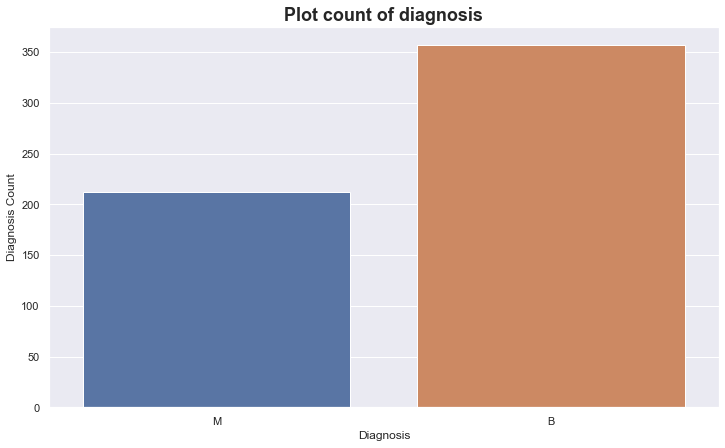

In [22]:
vs.plot_count(df, 'diagnosis', "Diagnosis", "Diagnosis Count")

For the numerical columns we will exclude id.

In [23]:
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

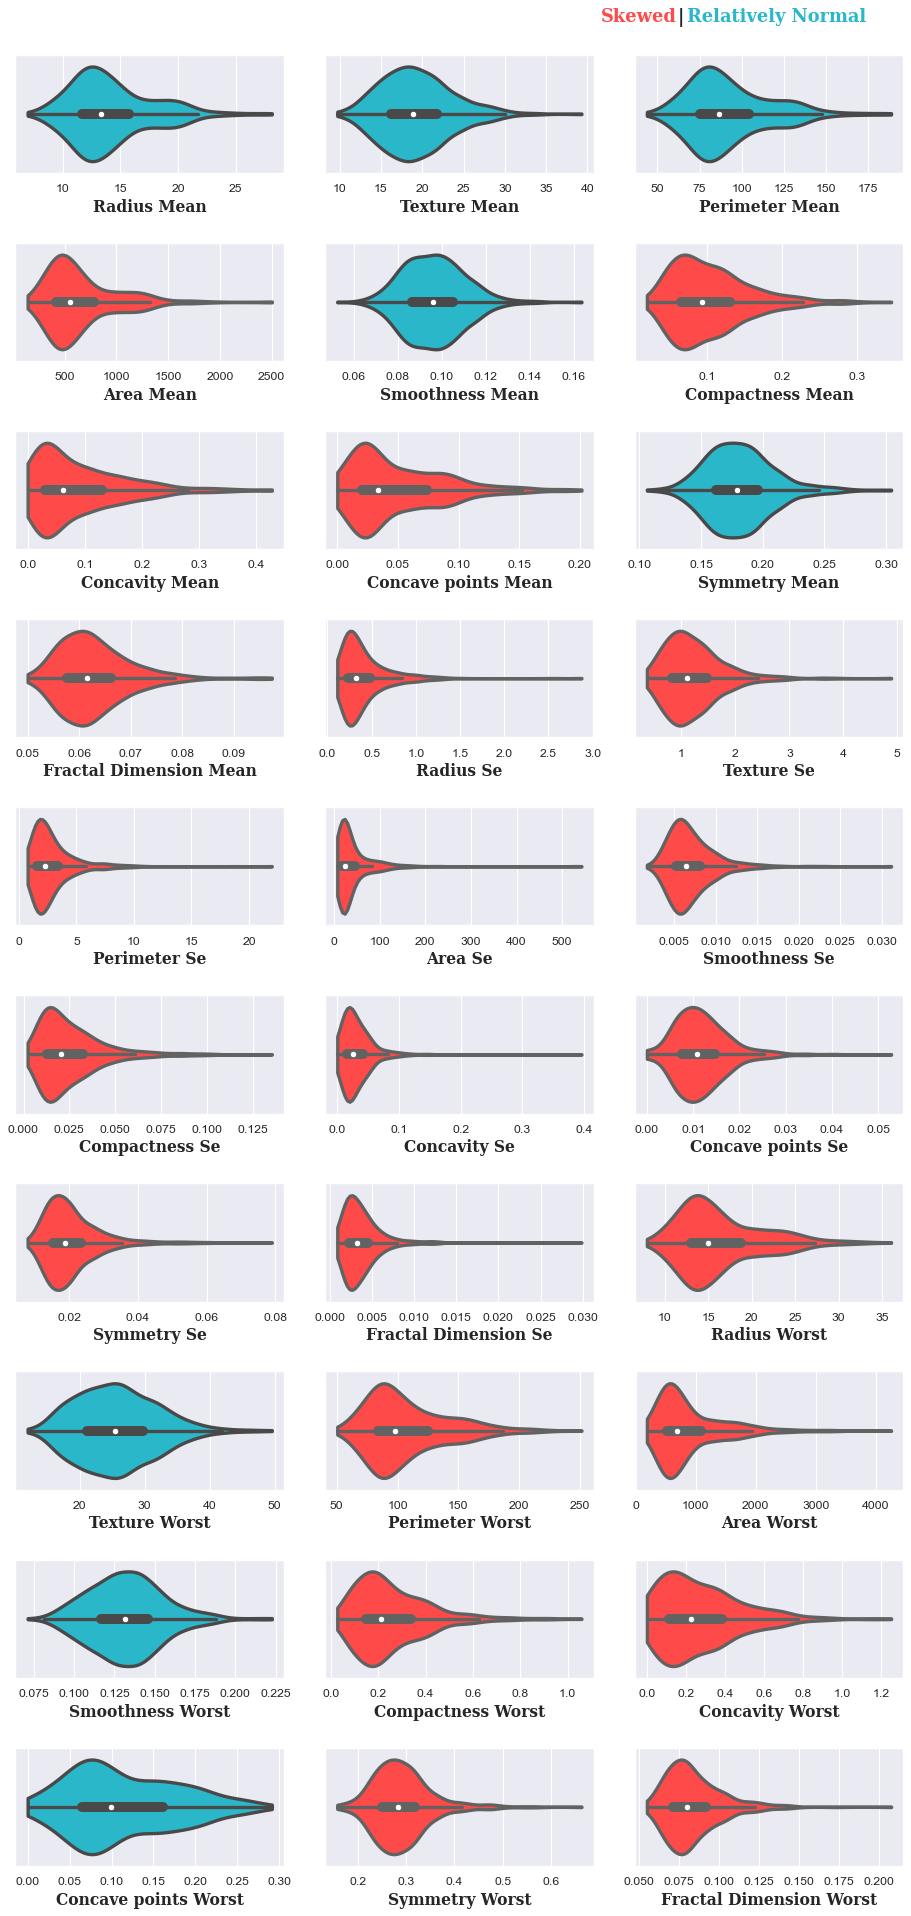

In [24]:
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # skewness
    if skew(x[col])>1:
        color = colors[0]
    else:
        color = colors[1]

    ## plots
    sns.violinplot(x[col], ax =ax,
                   color = color, cut =0,
                   inner = 'box',
                   alpha = 1,linewidth = 3, edgecolor = 'solidblack', saturation =1 )

    ## plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 3,h_pad = 2.5, w_pad = 2.5)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':colors[0]})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relatively Normal",{'font':'serif','size':16, 'weight':'bold','color':colors[1]})

fig.show()

## Bivariate Analysis

### diagnosis vs other features

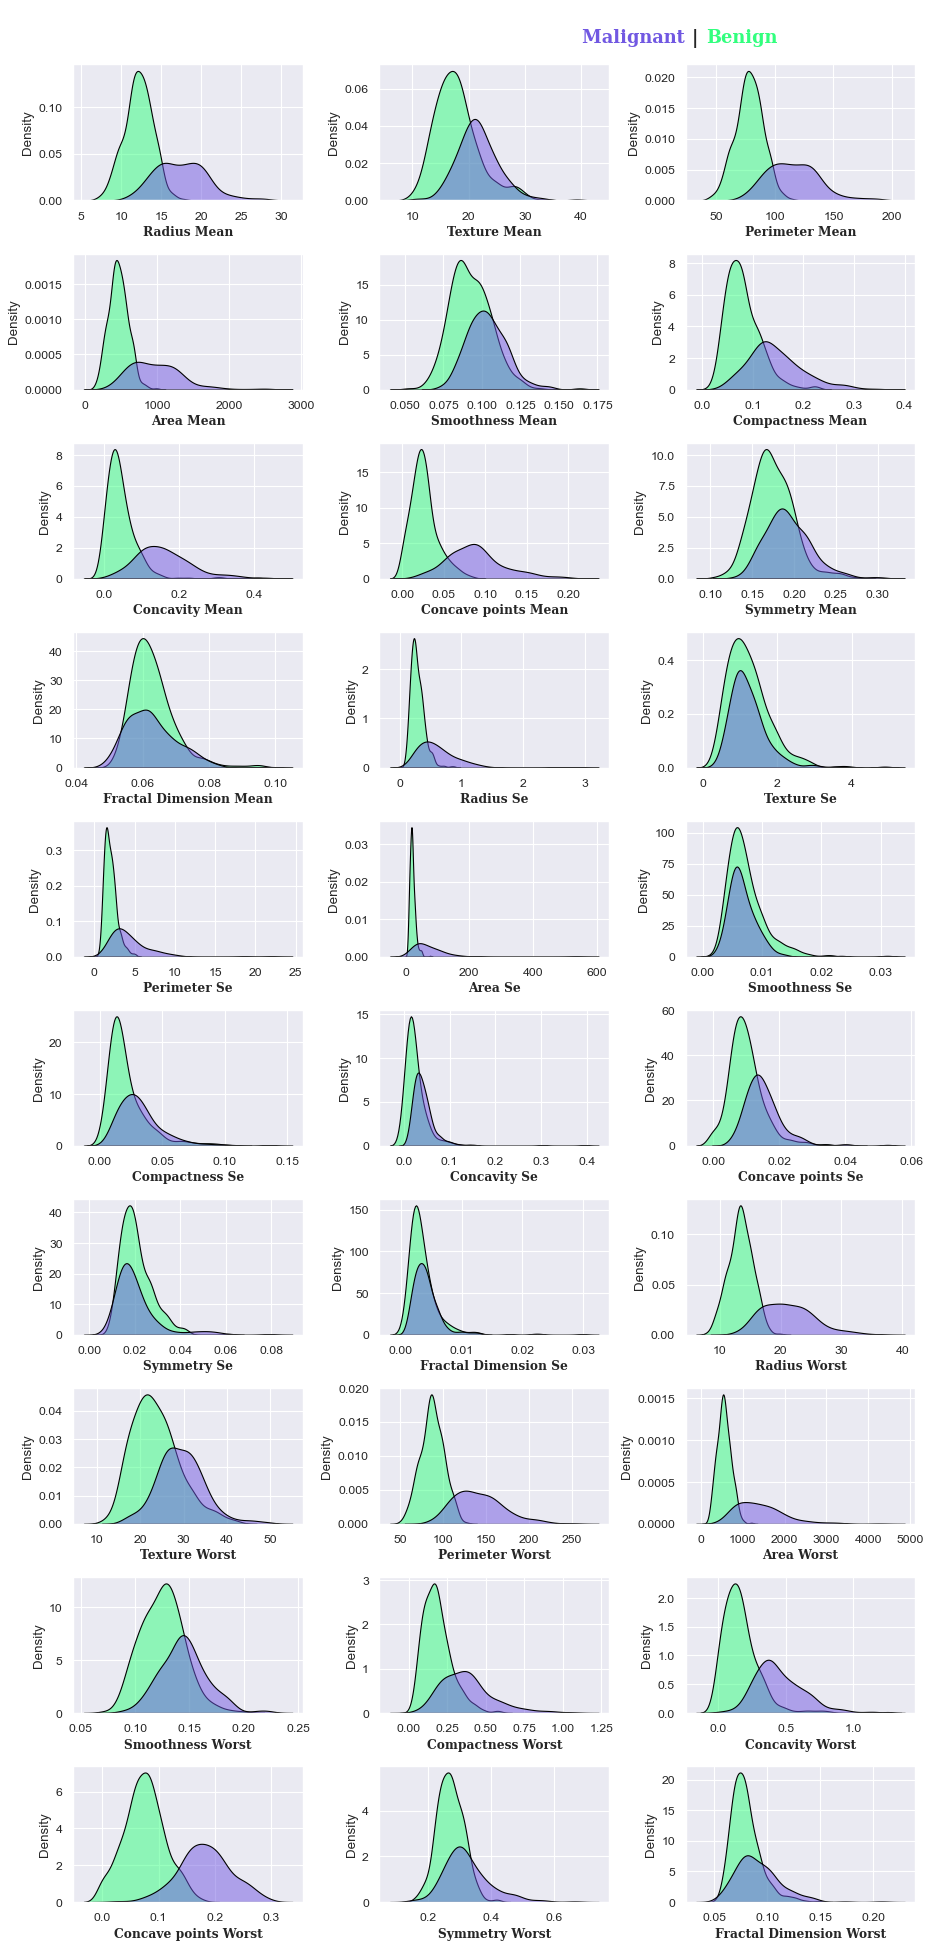

In [25]:
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # plots
    sns.kdeplot(df[col], ax = ax, shade = True ,
                palette=["#7158e2", "#32ff7e"],
                alpha = 0.5, linewidth = 1, ec = 'black',
                hue = df['diagnosis'], hue_order = ['M','B'],
                legend = False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':11, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 2,h_pad = 1, w_pad = 1)

fig.text(0.615,1, "\n Malignant",{'font':'serif','size':16, 'weight':'bold', 'color':"#7158e2"}, alpha = 1)
fig.text(0.735,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.75,1, "Benign",{'font':'serif','size':16, 'weight':'bold','color':"#32ff7e"}, alpha = 1)

fig.show()

### Pairplots

To observe the data better the plots are done in 3 groups each containing 10 features .

In [26]:
mean_df = x.iloc[:, 0:10]
se_df = x.iloc[:, 10:20]
worst_df = x.iloc[:, 20:30]

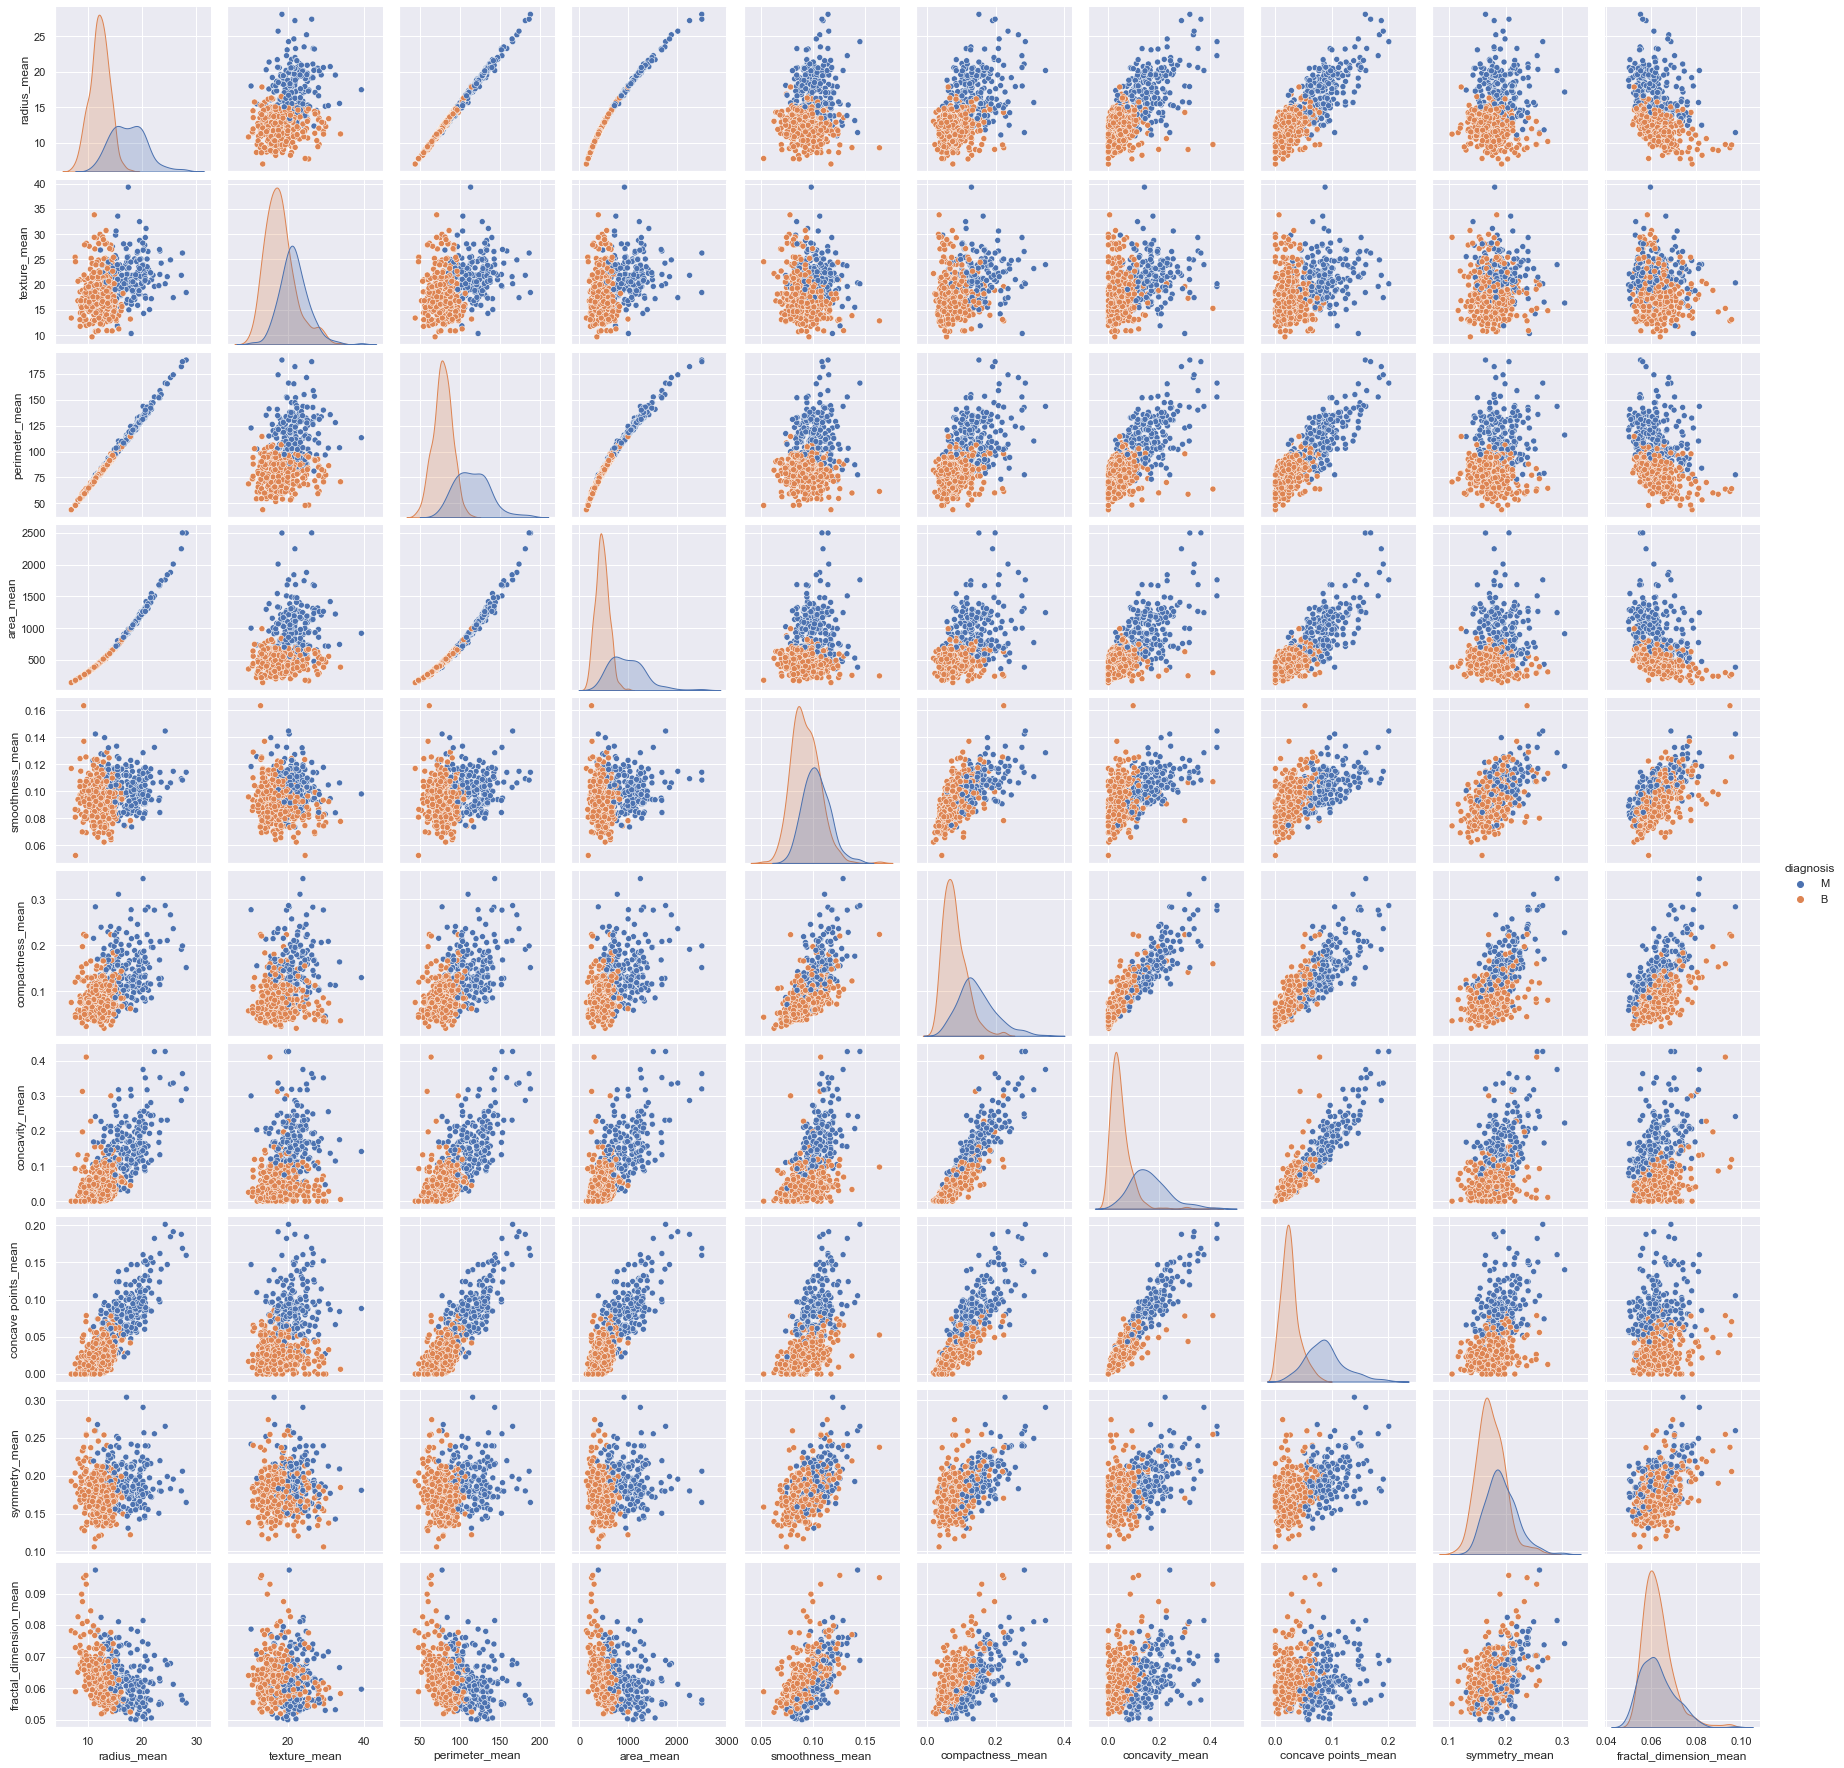

In [27]:
mean_df_dia = mean_df.copy()
mean_df_dia['diagnosis'] = y
sns.pairplot(mean_df_dia, hue="diagnosis")
plt.show()

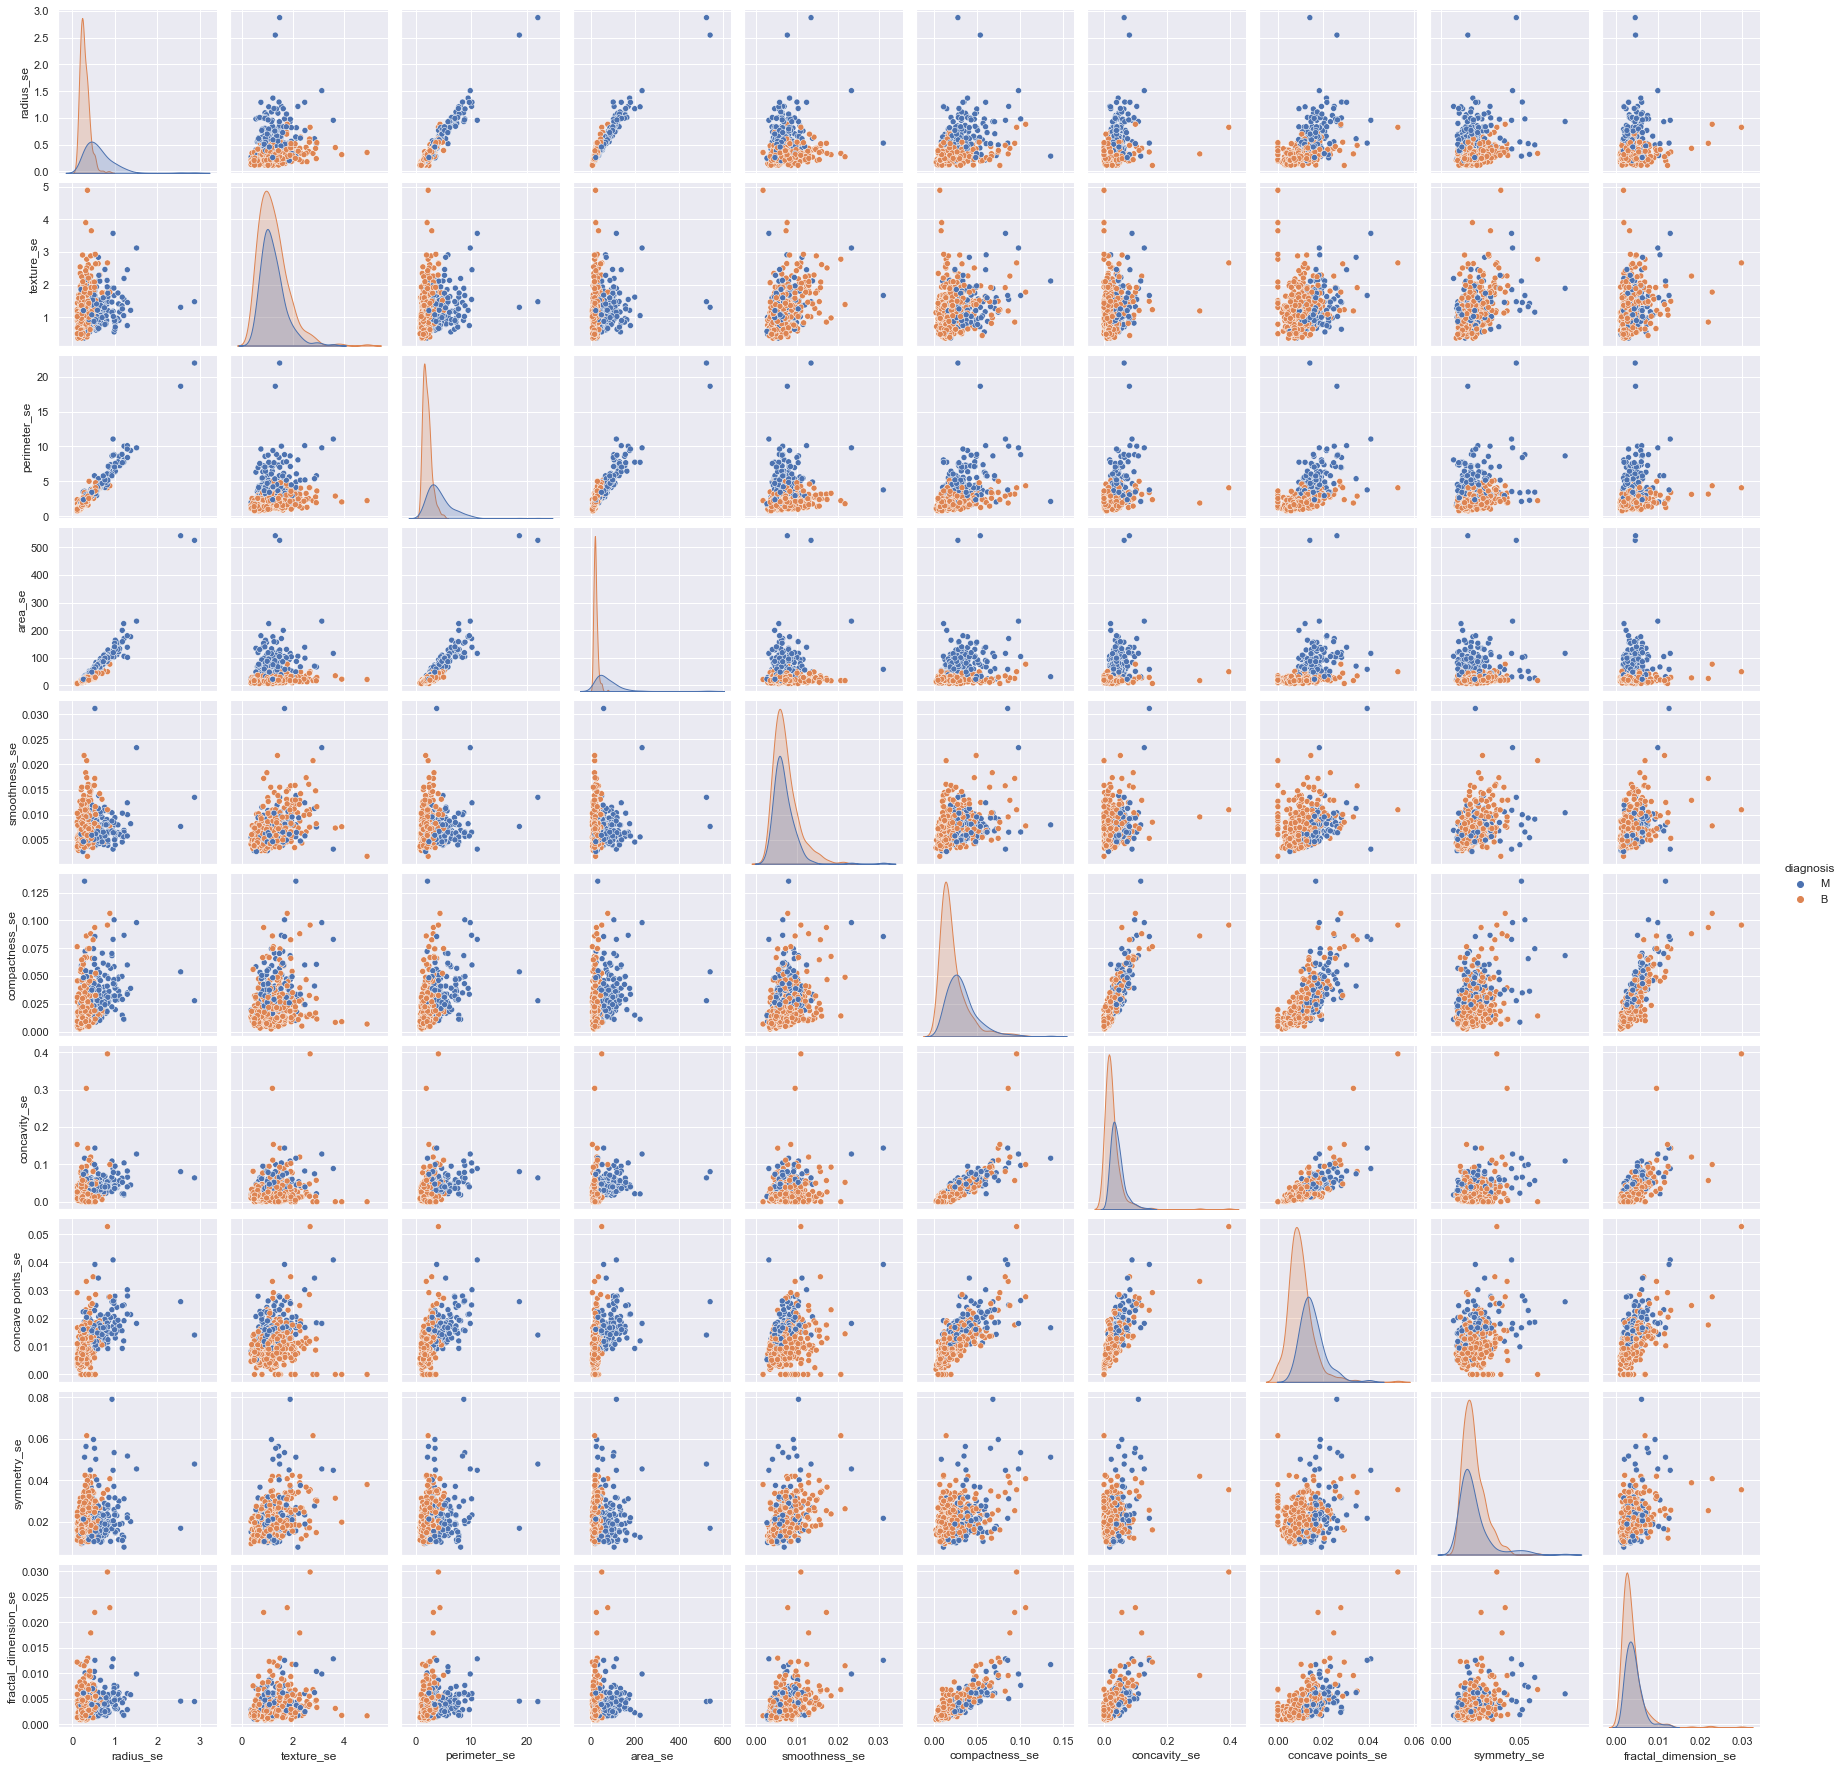

In [28]:
se_df_dia = se_df.copy()
se_df_dia['diagnosis'] = y
sns.pairplot(se_df_dia, hue="diagnosis")
plt.show()

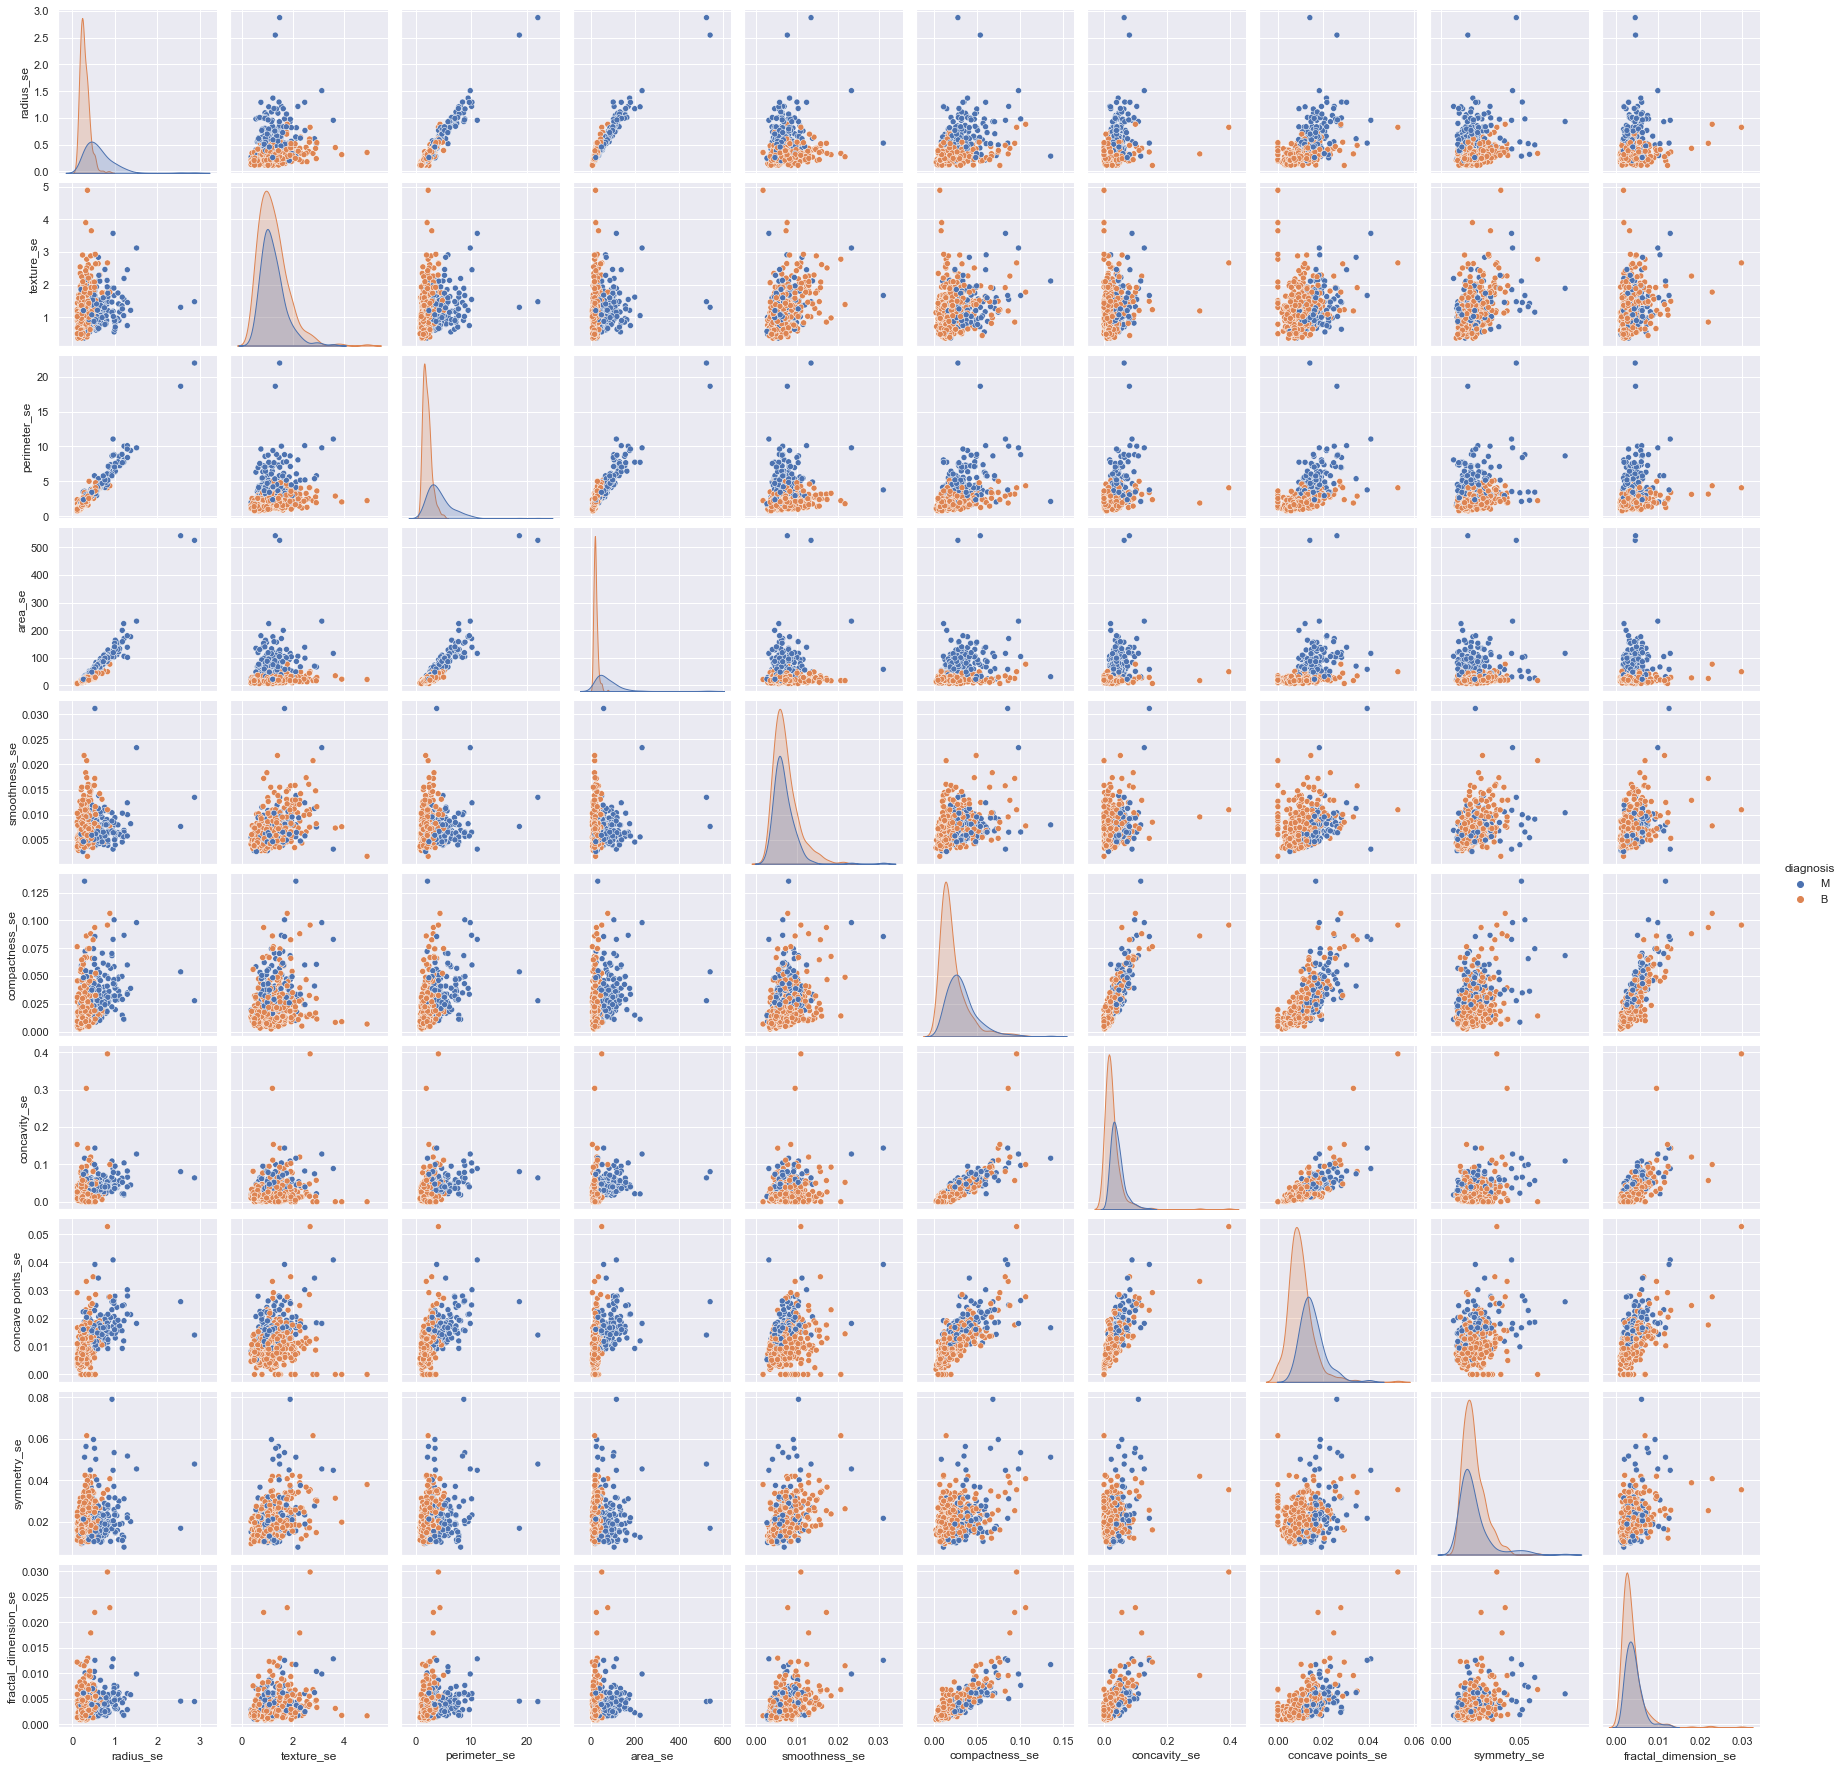

In [29]:
worst_df_dia = se_df.copy()
worst_df_dia['diagnosis'] = y
sns.pairplot(worst_df_dia, hue="diagnosis")
plt.show()


### Violin plots

Before we do violin and swarm plots we need to normalize or standirdize our data. Because differences between values of features are very high to observe on plot.

In [30]:
normal_x = helper.custome_normalizer(x)

In [31]:
mean_df = normal_x.iloc[:, 0:10]
se_df = normal_x.iloc[:, 10:20]
worst_df = normal_x.iloc[:, 20:30]


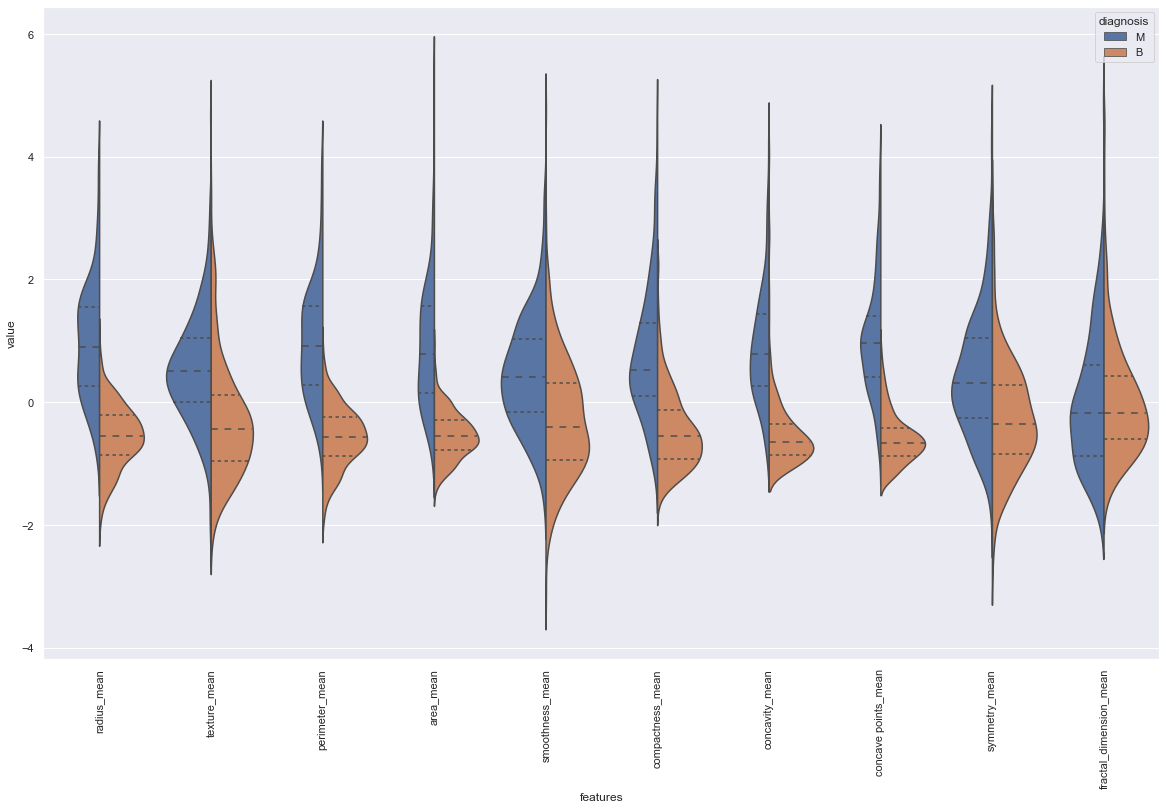

In [32]:
vs.violinplot(normal_x, y, 0, 10)

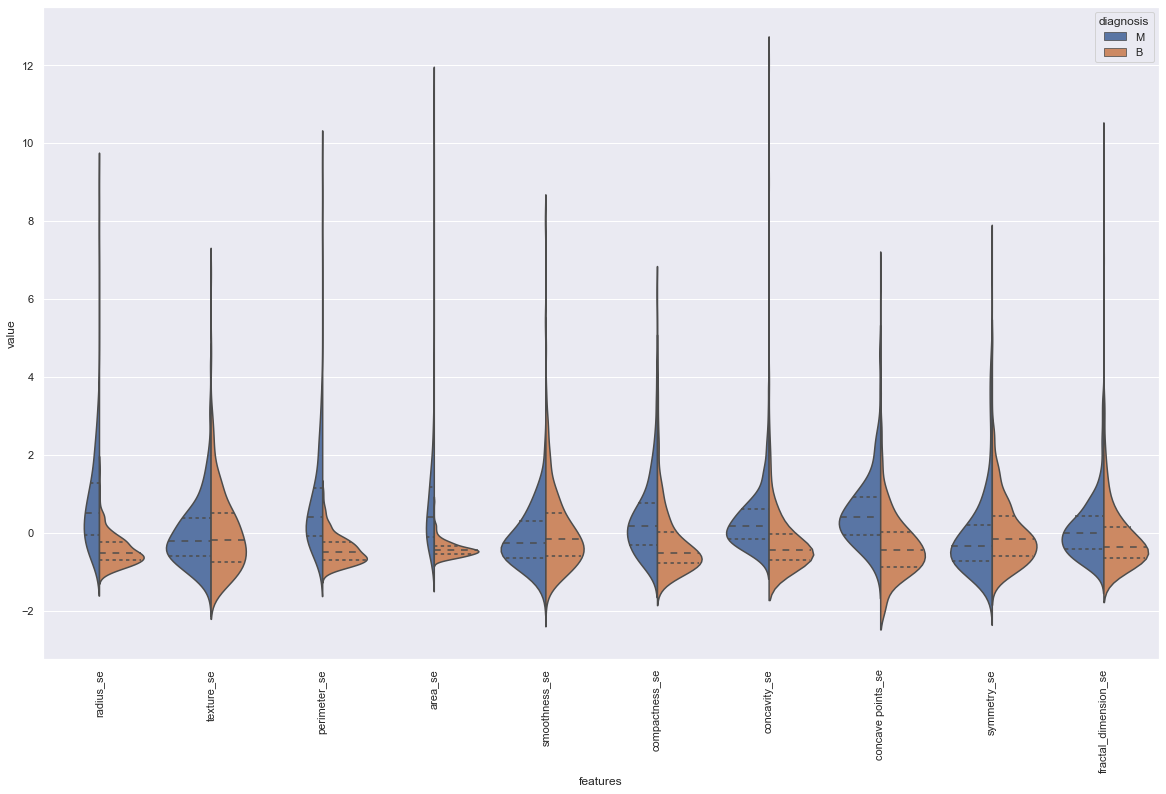

In [33]:
vs.violinplot(normal_x, y, 10, 20)

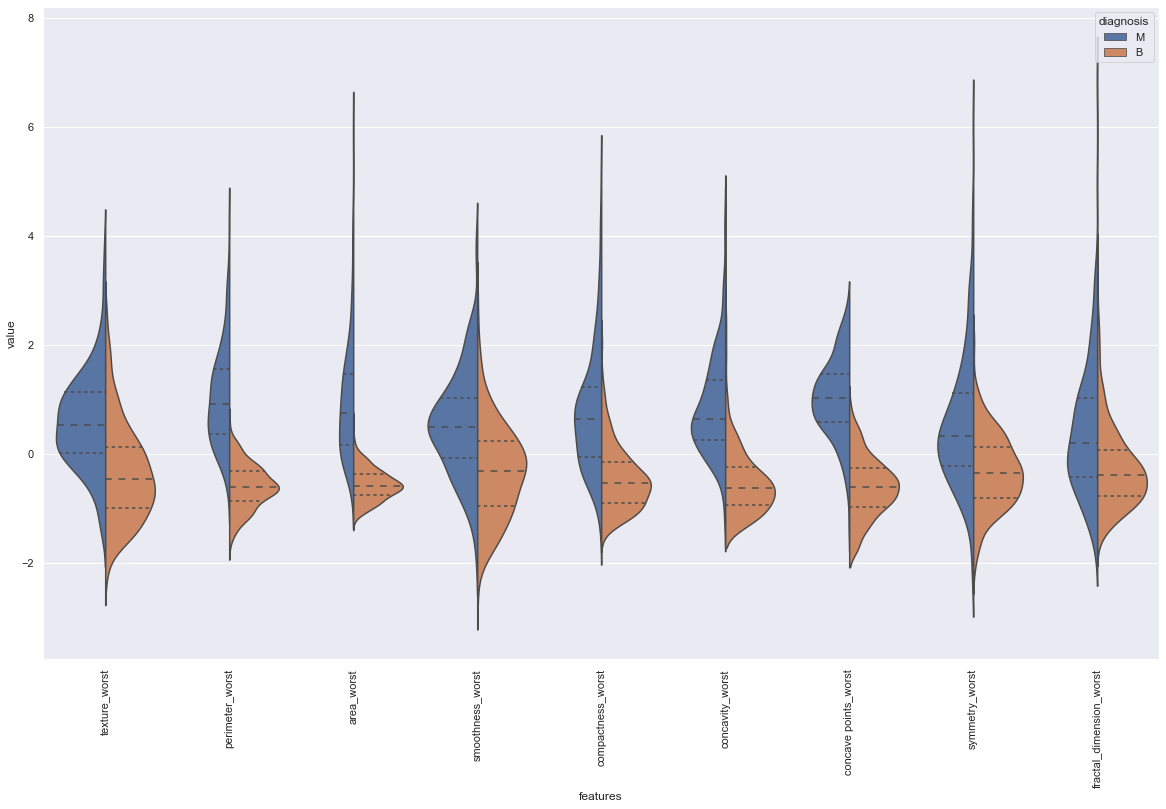

In [34]:
vs.violinplot(normal_x, y, 21, 30)

### Swarm plots

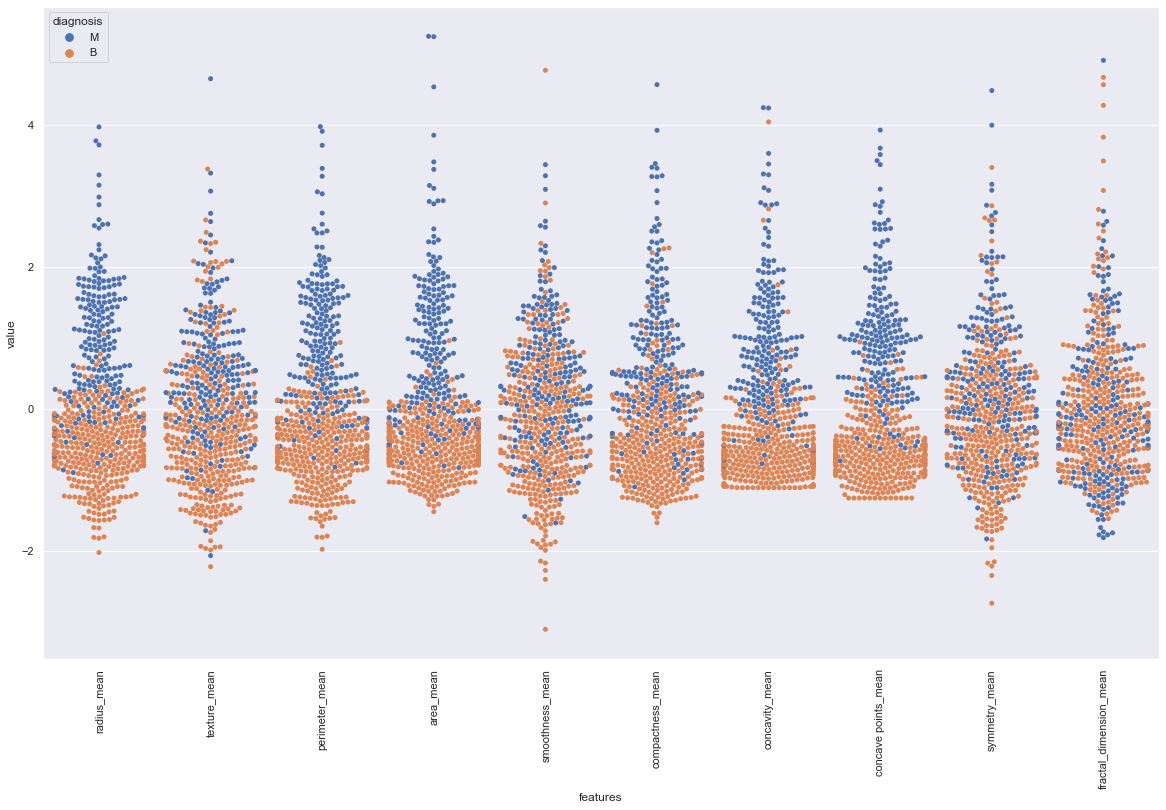

In [35]:
vs.swarmplot(normal_x, y, 0, 10)

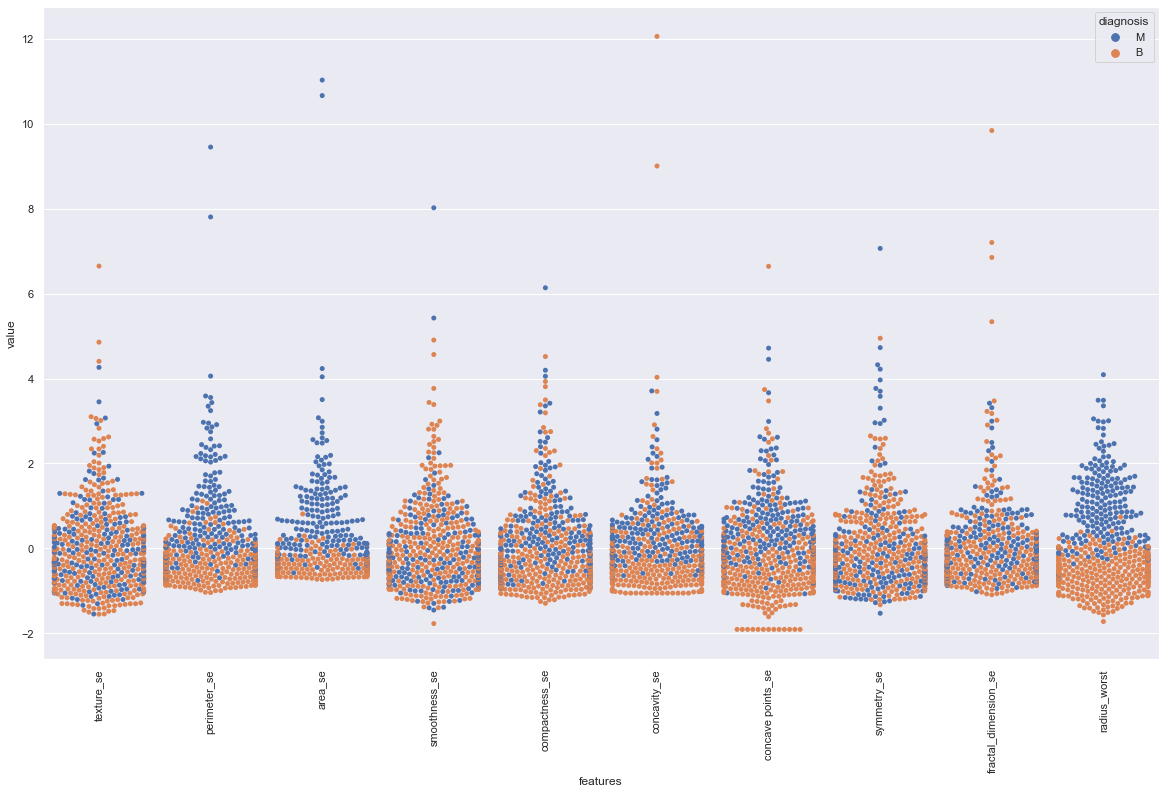

In [36]:
vs.swarmplot(normal_x, y, 11, 21)

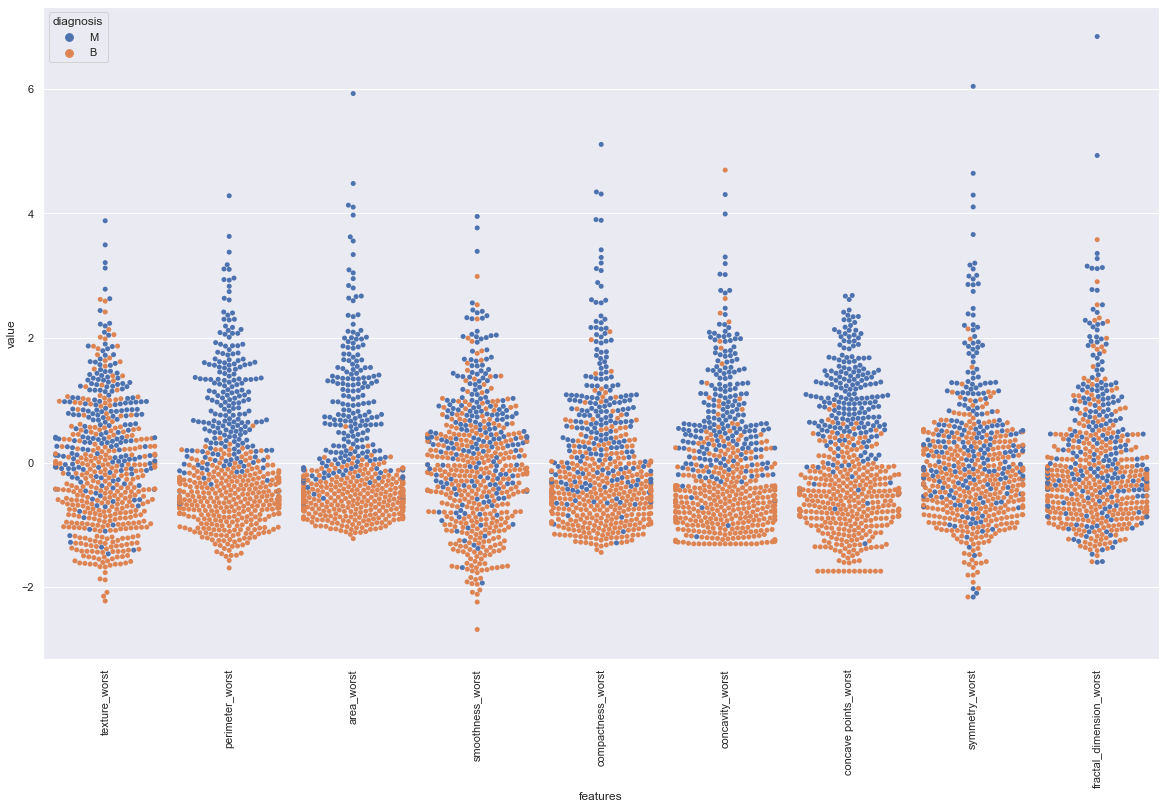

In [37]:
vs.swarmplot(normal_x, y, 21, 30)

### Box plots

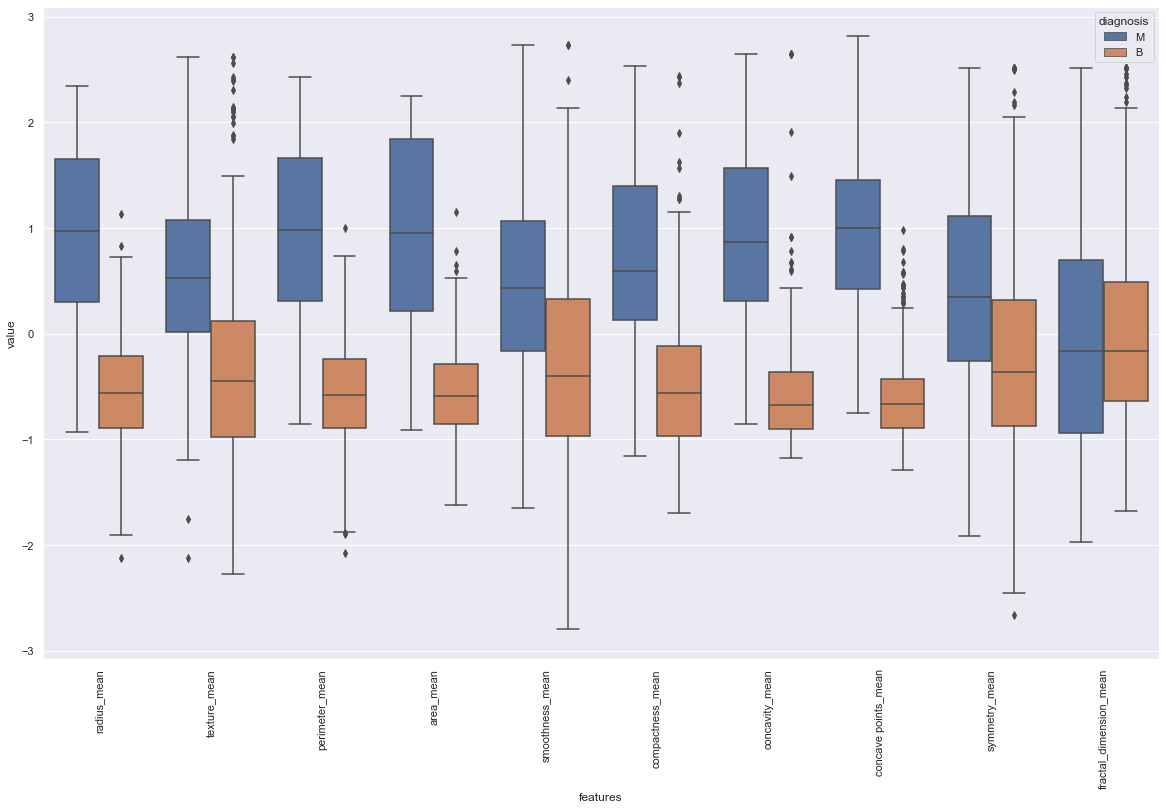

In [163]:
vs.boxplot(normal_x, y, 0, 10)

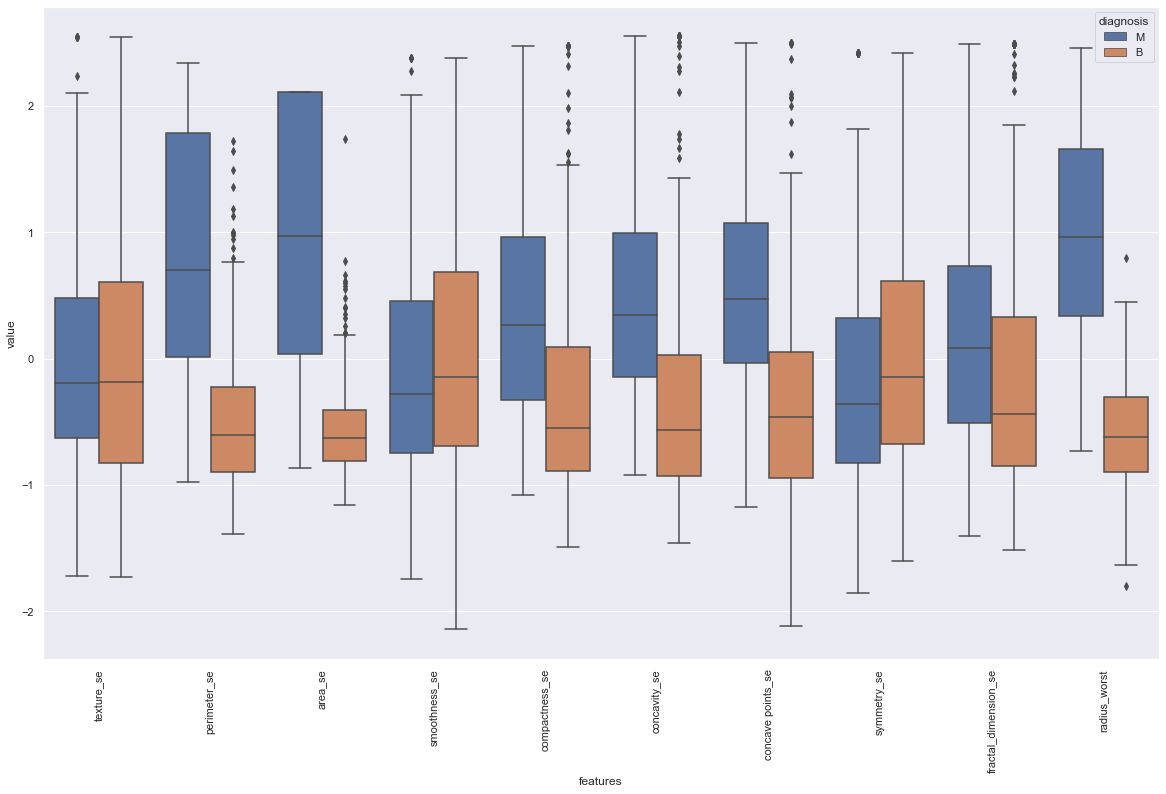

In [164]:
vs.boxplot(normal_x, y, 11, 21)

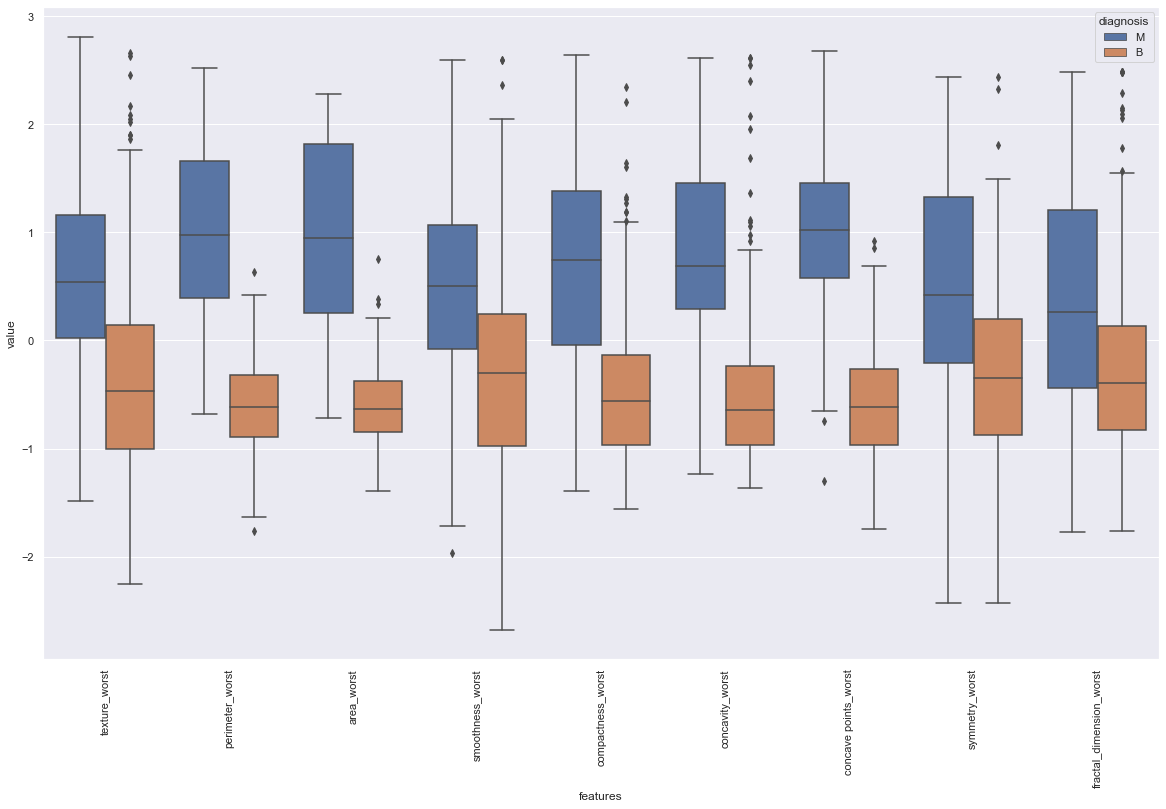

In [165]:
vs.boxplot(normal_x, y, 21, 30)

## Outliers

In [14]:
outlier_handler = DfOutlier(df)
columns = df.select_dtypes('float64').columns.tolist()
df_ = outlier_handler.getOverview(columns)
vs.view_df(df_, ['Min', 'Q1', 'Median', "Q3", "Max", "IQR", "Lower fence", "Upper fence", "Skew", "Number_of_outliers"])

Name of columns 
 Min 
 Q1 
 Median 
 Q3 
 Max 
 IQR 
 Lower fence 
 Upper fence 
 Skew 
 Number_of_outliers 
 Percentage_of_outliers 
 
 
 
 
 0 
 area_se 
 6.802000 
 17.850000 
 24.530000 
 45.190000 
 542.200000 
 27.340000 
 -23.160000 
 86.200000 
 5.447186 
 65 
 0.04% 
 
 
 1 
 radius_se 
 0.111500 
 0.232400 
 0.324200 
 0.478900 
 2.873000 
 0.246500 
 -0.137350 
 0.848650 
 3.088612 
 38 
 0.03% 
 
 
 2 
 perimeter_se 
 0.757000 
 1.606000 
 2.287000 
 3.357000 
 21.980000 
 1.751000 
 -1.020500 
 5.983500 
 3.443615 
 38 
 0.03% 
 
 
 3 
 area_worst 
 185.200000 
 515.300000 
 686.500000 
 1084.000000 
 4254.000000 
 568.700000 
 -337.750000 
 1937.050000 
 1.859373 
 35 
 0.02% 
 
 
 4 
 smoothness_se 
 0.001713 
 0.005169 
 0.006380 
 0.008146 
 0.031130 
 0.002977 
 0.000703 
 0.012612 
 2.314450 
 30 
 0.02% 
 
 
 5 
 compactness_se 
 0.002252 
 0.013080 
 0.020450 
 0.032450 
 0.135400 
 0.019370 
 -0.015975 
 0.061505 
 1.902221 
 28 
 0.02% 
 
 
 6 
 fractal_dimension_se 
 0.000895 
 0.002248 
 0.003187 
 0.004558 
 0.029840 
 0.002310 
 -0.001217 
 0.008023 
 3.923969 
 28 
 0.02% 
 
 
 7 
 symmetry_se 
 0.007882 
 0.015160 
 0.018730 
 0.023480 
 0.078950 
 0.008320 
 0.002680 
 0.035960 
 2.195133 
 27 
 0.02% 
 
 
 8 
 area_mean 
 143.500000 
 420.300000 
 551.100000 
 782.700000 
 2501.000000 
 362.400000 
 -123.300000 
 1326.300000 
 1.645732 
 25 
 0.02% 
 
 
 9 
 fractal_dimension_worst 
 0.055040 
 0.071460 
 0.080040 
 0.092080 
 0.207500 
 0.020620 
 0.040530 
 0.123010 
 1.662579 
 24 
 0.02% 
 
 
 10 
 symmetry_worst 
 0.156500 
 0.250400 
 0.282200 
 0.317900 
 0.663800 
 0.067500 
 0.149150 
 0.419150 
 1.433928 
 23 
 0.02% 
 
 
 11 
 concavity_se 
 0.000000 
 0.015090 
 0.025890 
 0.042050 
 0.396000 
 0.026960 
 -0.025350 
 0.082490 
 5.110463 
 22 
 0.01% 
 
 
 12 
 texture_se 
 0.360200 
 0.833900 
 1.108000 
 1.474000 
 4.885000 
 0.640100 
 -0.126250 
 2.434150 
 1.646444 
 20 
 0.01% 
 
 
 13 
 concave points_se 
 0.000000 
 0.007638 
 0.010930 
 0.014710 
 0.052790 
 0.007072 
 -0.002970 
 0.025318 
 1.444678 
 19 
 0.01% 
 
 
 14 
 concavity_mean 
 0.000000 
 0.029560 
 0.061540 
 0.130700 
 0.426800 
 0.101140 
 -0.122150 
 0.282410 
 1.401180 
 18 
 0.01% 
 
 
 15 
 radius_worst 
 7.930000 
 13.010000 
 14.970000 
 18.790000 
 36.040000 
 5.780000 
 4.340000 
 27.460000 
 1.103115 
 17 
 0.01% 
 
 
 16 
 compactness_worst 
 0.027290 
 0.147200 
 0.211900 
 0.339100 
 1.058000 
 0.191900 
 -0.140650 
 0.626950 
 1.473555 
 16 
 0.01% 
 
 
 17 
 compactness_mean 
 0.019380 
 0.064920 
 0.092630 
 0.130400 
 0.345400 
 0.065480 
 -0.033300 
 0.228620 
 1.190123 
 16 
 0.01% 
 
 
 18 
 perimeter_worst 
 50.410000 
 84.110000 
 97.660000 
 125.400000 
 251.200000 
 41.290000 
 22.175000 
 187.335000 
 1.128164 
 15 
 0.01% 
 
 
 19 
 fractal_dimension_mean 
 0.049960 
 0.057700 
 0.061540 
 0.066120 
 0.097440 
 0.008420 
 0.045070 
 0.078750 
 1.304489 
 15 
 0.01% 
 
 
 20 
 symmetry_mean 
 0.106000 
 0.161900 
 0.179200 
 0.195700 
 0.304000 
 0.033800 
 0.111200 
 0.246400 
 0.725609 
 15 
 0.01% 
 
 
 21 
 radius_mean 
 6.981000 
 11.700000 
 13.370000 
 15.780000 
 28.110000 
 4.080000 
 5.580000 
 21.900000 
 0.942380 
 14 
 0.01% 
 
 
 22 
 perimeter_mean 
 43.790000 
 75.170000 
 86.240000 
 104.100000 
 188.500000 
 28.930000 
 31.775000 
 147.495000 
 0.990650 
 13 
 0.01% 
 
 
 23 
 concavity_worst 
 0.000000 
 0.114500 
 0.226700 
 0.382900 
 1.252000 
 0.268400 
 -0.288100 
 0.785500 
 1.150237 
 12 
 0.01% 
 
 
 24 
 concave points_mean 
 0.000000 
 0.020310 
 0.033500 
 0.074000 
 0.201200 
 0.053690 
 -0.060225 
 0.154535 
 1.171180 
 10 
 0.01% 
 
 
 25 
 texture_mean 
 9.710000 
 16.170000 
 18.840000 
 21.800000 
 39.280000 
 5.630000 
 7.725000 
 30.245000 
 0.650450 
 7 
 0.0% 
 
 
 26 
 smoothness_worst 
 0.071170 
 0.116600 
 0.131300 
 0.146000 
 0.222600 
 0.029400 
 0.072500 
 0.190100 
 0.415426 
 7 
 0.0% 
 
 
 27 
 smoothness_mean 
 0.052630 
 0.086370 
 0.

In [17]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
outlier_handler.replace_outliers_with_fences(x.columns)

In [ ]:
file_handler.to_csv(outlier_handler.df, '../data/data.csv')

## Correlation Analysis

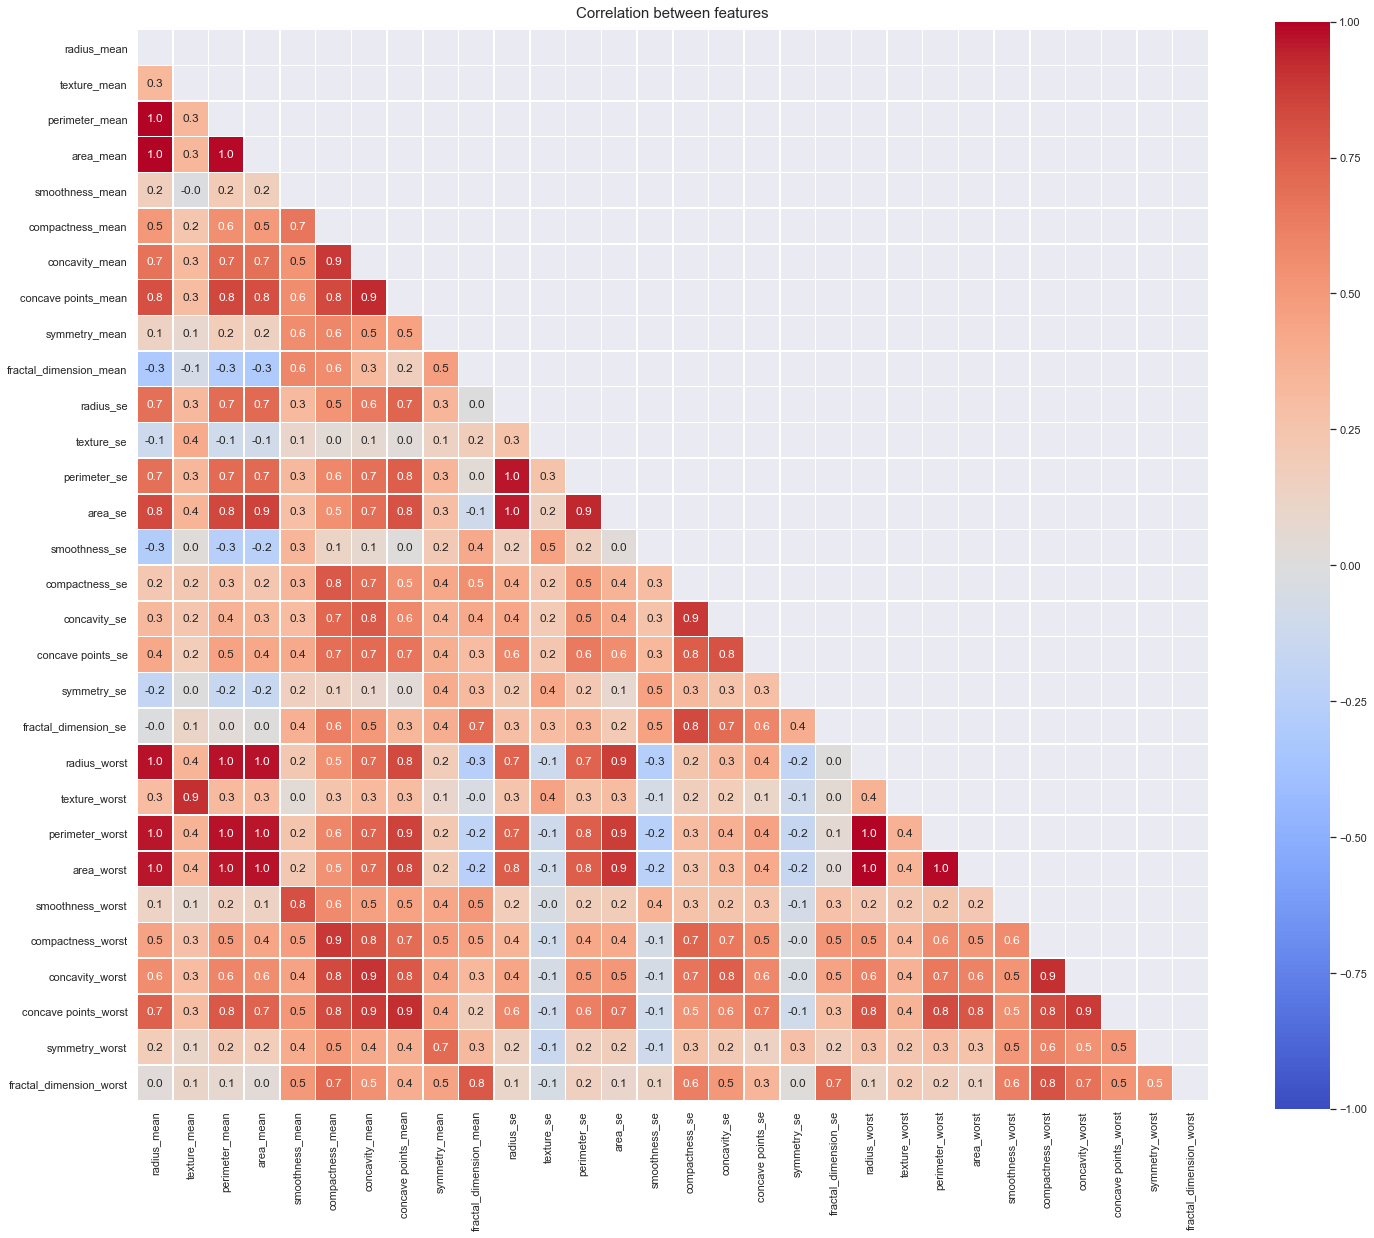

In [166]:
vs.plot_correlation(x)